# Data Science Project Lifecycle (OSEMN framework)



![alt text](https://miro.medium.com/max/1400/1*eE8DP4biqtaIK3aIy1S2zA.png "OSEMN framework")


### [These are the steps we are going to implement throough our problem](https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492)

# 1) Obtain 
Gather data and understand it

## Fertility Data Set

#### Abstract: 
100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits

* **Data Set Characteristics:**  Multivariate

* **Number of Instances:** 100

* **Number of Attributes:** 10

* **Associated Tasks:** Classification, Regression

#### Attribute Information:

- Season in which the analysis was performed
    - winter
    - spring
    - summer 
    - fall

- Age at the time of analysis 
    - 18-36

- Childish diseases (ie , chicken pox, measles, mumps, polio)
    - yes
    - no

- Accident or serious trauma
    - yes
    - no

- Surgical intervention
    - yes
    - no

- High fevers in the last year
    - less than three months ago
    - more than three months ago
    - no

- Frequency of alcohol consumption
    - several times a day
    - every day
    - several times a week
    - once a week
    - hardly ever or never

- Smoking habit
    - never
    - occasional
    - daily

- Number of hours spent sitting per day

#### Our Question
- **Output: Diagnosis** 
    - normal (N) 
    - altered (O)
    
[You can download Fertility Data Set from Kaggle](https://www.kaggle.com/muhamedyoussry/fertility-data-set)


### Load and investigating the data

load data as datafram from pandas and see what the data look like

In [21]:
import pandas as pd

# data frame = df 
df = pd.read_csv('fertility.csv')
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


In [22]:
# get some information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
Season                                   100 non-null object
Age                                      100 non-null int64
Childish diseases                        100 non-null object
Accident or serious trauma               100 non-null object
Surgical intervention                    100 non-null object
High fevers in the last year             100 non-null object
Frequency of alcohol consumption         100 non-null object
Smoking habit                            100 non-null object
Number of hours spent sitting per day    100 non-null int64
Diagnosis                                100 non-null object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


# 2) Scrub

This process is for cleaning and filtering our data. 

This process is so important and critical, referring to **“garbage in, garbage out”** philosophy, if the data is unfiltered and irrelevant, the results of the analysis will not mean anything, Think of this process as organizing and tidying up the data

### Preprocessing 

we will be able to deal with numbers better than strings so we will convert all discrete string values to integer values to easy our statistical calculations

| Column        | 0             | 1     |  2  |  3  |  4  |
| :------------- |:-------------:|:-------------:|   :-------------:| :-------------:  |  :-------------:  |
| Season     | **null** |     winter |   spring |  summer  |  fall  |
| Childish diseases      | no      |   yes |   **null** |  **null**  |  **null**  |
| Accident or serious trauma | no      |   yes |   **null** |  **null**  |  **null**  |
| Surgical intervention | no      |   yes |   **null** |  **null**  |  **null**  |
| High fevers in the last year | no      |   less than 3 months ago |   more than 3 months ago |  **null**  |  **null**  |
| Frequency of alcohol consumption | hardly ever or never      |   once a week |   several times a week | every day |  several times a day |
| Smoking habit | never |  occasional |   daily |  **null**  |  **null**  |
| Diagnosis | Altered |  Normal |    **null** |  **null**  |  **null**  |


In [23]:
# data transformation and replacement from string to integer
fertility = df

fertility['Season'].replace({"winter":1, "spring":2, "summer":3, "fall":4 }, inplace= True)
fertility['Childish diseases'].replace({"yes":1, "no":0}, inplace= True)
fertility['Accident or serious trauma'].replace({"yes":1, "no":0}, inplace= True)
fertility['Surgical intervention'].replace({"yes":1,"no":0}, inplace= True)
fertility['High fevers in the last year'].replace({"more than 3 months ago":2,"less than 3 months ago":1,"no":0}, inplace= True)
fertility['Frequency of alcohol consumption'].replace({"once a week":1,"hardly ever or never":0,"several times a week":2 , "every day":3 , "several times a day" : 4}, inplace= True)
fertility['Smoking habit'].replace({"daily":2, "occasional":1,"never":0}, inplace= True)
fertility['Diagnosis'].replace({"Normal":1,"Altered":0}, inplace= True)

In [24]:
fertility.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,2,30,0,1,1,2,1,1,16,1
1,2,35,1,0,1,2,1,2,6,0
2,2,27,1,0,0,2,0,0,9,1
3,2,32,0,1,1,2,0,0,7,1
4,2,30,1,1,0,2,1,0,9,0


In [25]:
fertility.describe()
# to make some statistical calculations for the data to understand it more 

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.380000,30.110000,0.870000,0.440000,0.510000,1.350000,0.840000,0.650000,10.800000,0.880000
std,1.195784,2.246861,0.337998,0.498888,0.502418,0.891883,0.837505,0.808728,33.616975,0.326599
min,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
50%,2.000000,30.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,7.000000,1.000000
75%,4.000000,32.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,9.000000,1.000000
max,4.000000,36.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,342.000000,1.000000


we can see here tha the  `Number of hours spent sitting per day` have some outlire from the huge standard deviation and the maximum value (342), so to make sure we can do some histogram

5      17
9      16
7      13
6      11
11     10
8      10
3      10
16      3
14      3
10      2
1       2
342     1
18      1
2       1
Name: Number of hours spent sitting per day, dtype: int64

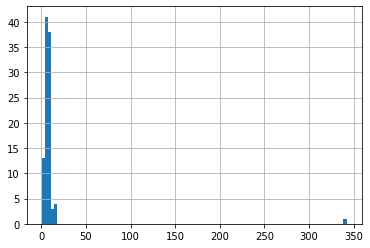

In [28]:
fertility["Number of hours spent sitting per day"].hist(bins=100)
fertility["Number of hours spent sitting per day"].value_counts()
# from the histogram and the value counts functions we can find that we have an outlire with 342, so we can delete this row

In [29]:
fertility.loc[fertility['Number of hours spent sitting per day'] == 342]
# and then delete this row

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
50,2,30,1,0,1,2,1,0,342,1


In [30]:
fertility.drop([50],axis=0, inplace =True)

### Test to find any missing values

In [34]:
fertility.isnull().sum()
# there is no any missing values in our data set and now we are ready to go and explore our data 

Season                                   0
Age                                      0
Childish diseases                        0
Accident or serious trauma               0
Surgical intervention                    0
High fevers in the last year             0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64

# 3) Explore

find significant patterns and trends using statistical methods and visulization

### Correlation

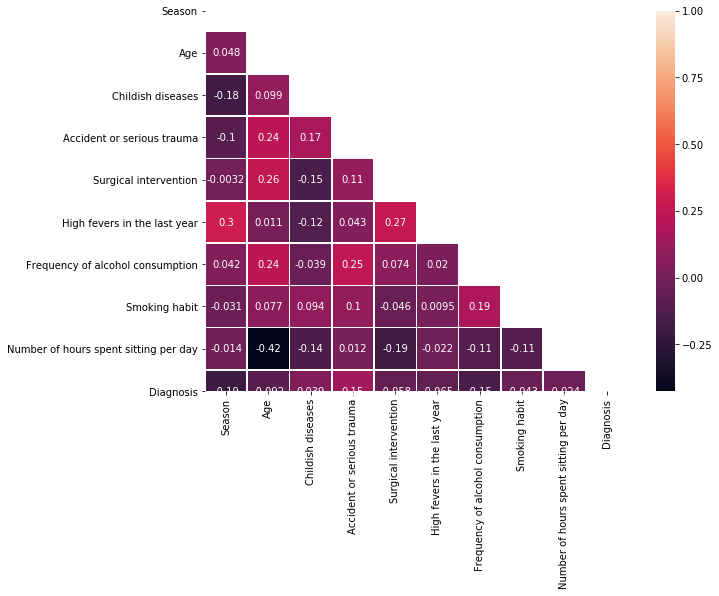

In [36]:
# to visualize the correlatin between the data 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

corr = fertility.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(corr,annot=True ,linewidths=.5,mask = mask,square=True)

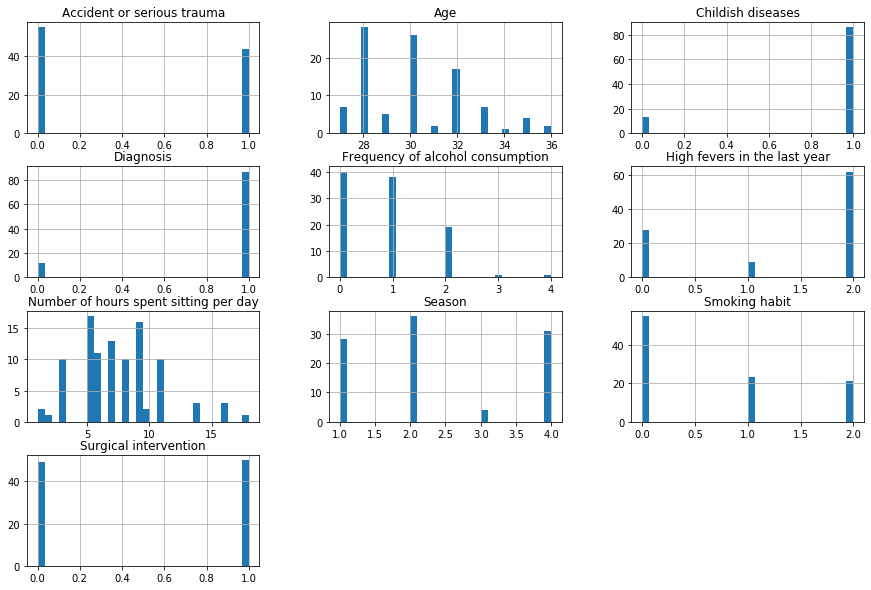

In [37]:
fertility.hist(bins = 30 , figsize=(15,10))
plt.show()

using this histogram we can tell that the diagnosis have soem relationship with the childish diseases

# 4) Model

construct models to predict and forecast 

In [40]:
# split our data to features and output 

X = fertility.drop("Diagnosis" , axis = 1)
y = fertility["Diagnosis"]

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# split the data to train and test model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

dec = DecisionTreeClassifier() 
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier()
svm = SVC(random_state=1)
naive = GaussianNB()
logReg = LogisticRegression()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive,
          "Logistics regression": logReg}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)
    
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

F:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Accuracy Score
Random forest,1.000000
KNN,0.933333
SVM,0.933333
Naive bayes,0.933333
Logistics regression,0.933333
Decision tree,0.866667
